Привет! Меня зовут Валерий Гриднев, я провожу ревью твоей работы. Предлагаю общаться на «ты», если не против.

В работе ты увидишь комментарии, помеченные разным цветом.

<div class="alert alert-success">
Зеленым цветом помечены оброзцовые решения. Которые можно использовать в дальнейшем.
</div>

<div class="alert alert-warning">
Желтым цветом отмечено то, что ты можешь улучшить или доработать. Можешь учесть это при выполнении следующих работ или доработать проект сейчас, но это не обязательно.
</div>

<div class="alert alert-danger">
Красным цветом помечены моменты, которые необходимо доработать, чтобы проект был принят. Уверен, что у тебя все получится. Буду ждать твою работу на повторное ревью. 
</div>

Будет комфортнее работать над проектом вместе, если ты будешь **писать об изменениях** в проекте по моим рекомендациям. Для этого выбери для своих комментариев 

<div class="alert alert-block alert-info">заметный цвет</div>

Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее.
___

<div class="alert alert-block alert-info">
Привет, Валерий! Спасибо за замечания - очень по делу! Исправил)</div>

<div class="alert alert-success">
    
**Комментарий ревьюера v_2**
    
Спасибо за оперативность, сейчас посмотрим)
</div>

<div class="alert alert-block alert-info">
Валерий, вопрос оставил внизу)

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# Структура проекта
* [Подготовка данных](#section_1)
* [Исследование задачи](#section_2)
* [Борьба с дисбалансом](#section_3)
* [Тестирование моделей](#section_4)
* [Выводы](#section_5)

<a id='section_1'></a>

# 1. Подготовка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score


import warnings
warnings.filterwarnings('ignore')

Данные загружены. Исследуем данные.

In [2]:
data = pd.read_csv('/datasets/Churn.csv')
display(data.head())
display(data.info())
display(data.shape)
display(data.describe())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

(10000, 14)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Приведем названия столбцов к нижнему регистру

In [3]:
data.columns = [x.lower() for x in data.columns]

Приведем столбец столбец tenure к целому значению. Все-таки недвижимость это число целое, хотя есть исключения. 

Заполним пропуски нулями, так не будет проблем с обучением.

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
А можно пример не целой недвижимости?)Когда он с кем-то условно 50/50?)
    
Кроме заполнения 0, какие еще варианты рассматривал?
</div>

<div class="alert alert-block alert-info">
Конечно можно: люди покупают комнаты в квартирах или ,например, в наследсво может быть вписано несколько наследников, каждому -  по доле. Квартира, купленная в браке ,при разводе неожиданно делиться на 2 части)) 

Можно заполнить медианой, но мне тут один ревьюер сообщил, что данные лучше постараться по возможности не менять) Ко всему прочему, если стоит пропуск, то велика вероятность, что и недвижимости нет. Что посоветуешь?
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера v_3**
    
Так как сейчас идет обучение, я бы советовал делать по возможности все варианты и выбирать тот, который даёт наилучший результат)Если не ошибаюсь, как раз в этой работе результат будет лучше, если просто удалить признак **tenure**)
</div>

In [4]:
data['tenure'] = data['tenure'].astype(pd.Int64Dtype())
data['tenure'].fillna(0, inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
rownumber          10000 non-null int64
customerid         10000 non-null int64
surname            10000 non-null object
creditscore        10000 non-null int64
geography          10000 non-null object
gender             10000 non-null object
age                10000 non-null int64
tenure             10000 non-null Int64
balance            10000 non-null float64
numofproducts      10000 non-null int64
hascrcard          10000 non-null int64
isactivemember     10000 non-null int64
estimatedsalary    10000 non-null float64
exited             10000 non-null int64
dtypes: Int64(1), float64(2), int64(8), object(3)
memory usage: 1.1+ MB


Посмотрим на корреляцию между признаками. Если будет плотная взаимосвязь, какой-нибудь столбец можно будет удалить и обучение пойдет легче.

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
А какой коэффициент корреляции должен быть, чтобы мы так сделали?)
</div>

<div class="alert alert-block alert-info">

  
Да почти единица) Вот скрин из прошлого проекта, там количество звонков тесно кореллировало с минутами звонков, ну вот я и удалил количество.
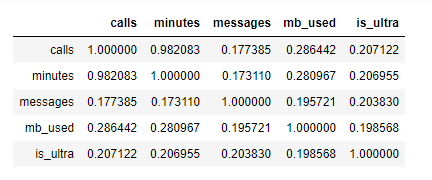


<div class="alert alert-success">
    
**Комментарий ревьюера v_2**
    
Окей)
</div>

In [6]:
data.corr()

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
rownumber,1.000000,0.004202,0.005840,0.000783,0.000596,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
customerid,0.004202,1.000000,0.005308,0.009497,-0.015747,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
creditscore,0.005840,0.005308,1.000000,-0.003965,0.003087,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,0.000783,0.009497,-0.003965,1.000000,-0.007368,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,0.000596,-0.015747,0.003087,-0.007368,1.000000,-0.005821,0.010106,0.021387,-0.025856,0.011225,-0.013319
balance,-0.009067,-0.012419,0.006268,0.028308,-0.005821,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
numofproducts,0.007246,0.016972,0.012238,-0.030680,0.010106,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
hascrcard,0.000599,-0.014025,-0.005458,-0.011721,0.021387,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
isactivemember,0.012044,0.001665,0.025651,0.085472,-0.025856,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimatedsalary,-0.005988,0.015271,-0.001384,-0.007201,0.011225,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


Text(0.5, 1.05, '')

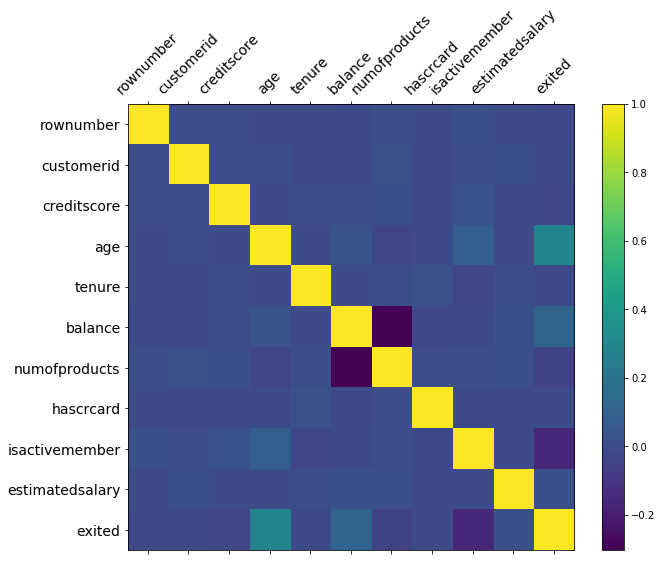

In [7]:
f = plt.figure(figsize=(10, 8))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params()
plt.title('', fontsize=16)

Явной корреляции между признаками не замечено. Данные не трогаем

In [8]:
data.head(1)

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1


Преобразуем категориальные признаки в численные, за одно приведем к одному масштабу.

Тут у меня есть вопрос: столбцы 'hascrcard', 'isactivemember' нужно приводить к одному масштабу ? 

<div class="alert alert-danger">
    
**Комментарий ревьюера**
    
Ты не исключил неинформативные признаки)Подумай какие)Не показалось, что 2900 столбцов это много?) Прошу исправить)
    
Что касается твоего вопроса, не очень его понял)Если тебя смущает, что там только 0 и 1, и вопрос в этом)То я думаю можно не делать)По сути, после стандартизации у тебя получится снова только 2 значения, которые не очень далеко друг от друга)
    
Еще раз повторю, мне кажется размыто написал)Делать стандартизацию ты можешь на любых столбцах, но там где значения по факту boolean, этого можно не делать
</div>

<div class="alert alert-block alert-info">
Ок. Индекс строки данных, уникальный идентификатор клиента и фамилия, думаю для обучения точно не нужны) Я оставил страну проживания, возможно это связано с уровнем жизни. Пол тоже оставил. Вдруг женщины импульсивны и чаще уходят от одного банка к другому банку) Но сперва с первым банком долго не разговаривают и не берут трубки)

<div class="alert alert-success">
    
**Комментарий ревьюера v_2**
    
Хах, про женщин интересное предположение)Да, в остальном прав)
</div>

In [9]:
data = data.drop(['rownumber', 'customerid', 'surname'], axis=1)
data.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
data_ohe = pd.get_dummies(data, drop_first=True)

target = data_ohe['exited']
features = data_ohe.drop('exited', axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345) 

numeric = ['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary', 'hascrcard', 'isactivemember']
scaler = StandardScaler()
scaler.fit(features_train[numeric]) 
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])

display(features_train.shape)
display(features_valid.shape) 

(7500, 11)

(2500, 11)

In [11]:
data['hascrcard'].value_counts()

1    7055
0    2945
Name: hascrcard, dtype: int64

# 2. Исследование задачи

Будем работать с тремя моделями: DecisionTreeClassifier, LogisticRegression, RandomForestClassifier

Будем рассматривать каждую модель, замеряя accuracy, F1-меру (чтобы понять с чего стартуем), матрицу ошибок, а дальше на графике посмотрим частотность классов.

In [12]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
accuracy_valid = accuracy_score(target_valid, predicted_valid)
print('Показатель accuracy: ', accuracy_valid)
print('Показатель F1-меры: ',f1_score(target_valid, predicted_valid))

Показатель accuracy:  0.776
Показатель F1-меры:  0.49458483754512633


In [13]:
confusion_matrix(target_valid, predicted_valid)

array([[1666,  299],
       [ 261,  274]])

Модель DecisionTreeClassifier часто видит ложноположительные значения - 185 и ложноотрицательные значения - 270. Так же модель определила истинноположительных значений 265 и истинноотрицательных 1780.

0    0.7708
1    0.2292
dtype: float64


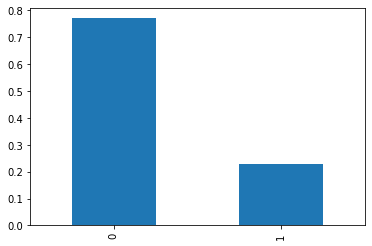

In [14]:
predicted_valid = pd.Series(model.predict(features_valid))
class_frequency = predicted_valid.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

Изучим LogisticRegression как он есть на несбалансированных классах

In [15]:
model2 = LogisticRegression(random_state=12345)
model2.fit(features_train, target_train)
predicted_valid2 = model2.predict(features_valid)
accuracy_valid2 = accuracy_score(target_valid, predicted_valid2)
print('Показатель accuracy: ', accuracy_valid2)
print('Показатель F1-меры: ' , f1_score(target_valid, predicted_valid2))

Показатель accuracy:  0.7972
Показатель F1-меры:  0.2928870292887029


In [16]:
confusion_matrix(target_valid, predicted_valid2)

array([[1888,   77],
       [ 430,  105]])

Модель DecisionTreeClassifier увидела ложноположительные значения - 100 , много ложноотрицательных значений - 435. Так же модель определила истинноположительных значений 100 и истинноотрицательных 1889.

0    0.9272
1    0.0728
dtype: float64


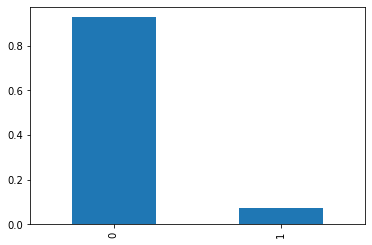

In [17]:
predicted_valid2 = pd.Series(model2.predict(features_valid))

class_frequency2 = predicted_valid2.value_counts(normalize=True)
print(class_frequency2)
class_frequency2.plot(kind='bar')

RandomForestClassifier

In [18]:
model3 = RandomForestClassifier(random_state=12345, n_estimators=6)
model3.fit(features_train, target_train)
predicted_valid3 = model3.predict(features_valid)
accuracy_valid3 = accuracy_score(target_valid, predicted_valid3)
print('Показатель accuracy: ', accuracy_valid3)
print('Показатель F1-меры: ' , (f1_score(target_valid, predicted_valid3)))

Показатель accuracy:  0.8356
Показатель F1-меры:  0.5124555160142349


In [19]:
confusion_matrix(target_valid, predicted_valid3)

array([[1873,   92],
       [ 319,  216]])

Модель RandomForestClassifier определила TP - 139, TN - 1924, FP - 41, FN - 396 (большое количество ложноотрицательных значений)

0    0.8768
1    0.1232
dtype: float64


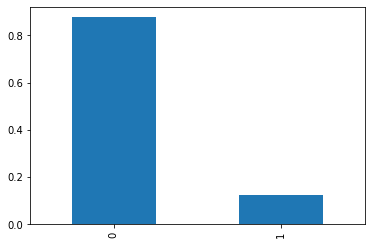

In [20]:
predicted_valid3 = pd.Series(model3.predict(features_valid))

class_frequency3 = predicted_valid3.value_counts(normalize=True)
print(class_frequency3)
class_frequency3.plot(kind='bar')

После анализа мы видим, что почти все модели показывают значение accuracy в районе 0,8 - неплохо, но по графикам видно явное преобладание одного класса над другим. ПРоверим.

Определим показатель константной модели - заполним ключевой показатель нулями.

In [21]:
target_pred_constant = pd.Series(0, index=target_train.index)

print('Показатель accuracy в Константной модели: ', accuracy_score(target_train, target_pred_constant)) 

Показатель accuracy в Константной модели:  0.7997333333333333


Показатель константной модели такой же как и 3 описанных выше. Налицо дисбаланс классов.

<div class="alert alert-warning">
    
**Комментарий ревьюера**
    
Получился неплохой блок, молодец) Нравится, что пишешь много рассуждений в ходе решения, однако в конце стоит формулировать и выделять итоги блоков)
</div>

<div class="alert alert-warning">
    
**Комментарий ревьюера v_2**
    
Очень жаль, что не выделил)
</div>

<a id='section_3'></a>

# 3. Борьба с дисбалансом

Опишем некоторые приемы для ликвидации дисбаланса

Добавим взвешивание классов в наши модели и измерим f1

In [22]:
model = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print('Показатель F1-меры: ' , f1_score(target_valid, predicted_valid))

Показатель F1-меры:  0.49855072463768113


In [23]:
model2 = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model2.fit(features_train, target_train)
predicted_valid2 = model2.predict(features_valid)

print('Показатель F1-меры: ' , f1_score(target_valid, predicted_valid2))

Показатель F1-меры:  0.5077441077441077


In [24]:
model3 = RandomForestClassifier(random_state=12345, n_estimators=6, class_weight='balanced')
model3.fit(features_train, target_train)
predicted_valid3 = model3.predict(features_valid)

print('Показатель F1-меры: ' , f1_score(target_valid, predicted_valid3))

Показатель F1-меры:  0.48327137546468396


Взвешивание классов в настройках модели помогло особенно в модели LogisticRegression, увеличение ф1-меры почти в 2 раза.


<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Отлично)
</div>

Попробуем уравновесить классы, увеличив положительный класс в 4 раза. В графиках каждой модели, в среднем, положительный класс больше отрицательного в 4 раза. Применим инструмент и проверим результаты.

<div class="alert alert-danger">
    
**Комментарий ревьюера**
    
Что значит в графиках моделей? Мы смотрим баланс классов в данных, а не в моделях. Ниже код, которые показывает реальное соотношение 4:1. Прошу тебя исправить) Результаты должны изменится после 1 и 2 поправок, поэтому дальше пока не смотрю)Не расстраивайся, ошибки это хорошо, они позволяют на тренировочных проектах получать очень нужный опыт)Если есть какие-то вопросы, буду рад на них ответить)
</div>

<div class="alert alert-block alert-info">
Согласен, исправляю) надеюсь, что правильно

In [25]:
data['exited'].value_counts()

0    7963
1    2037
Name: exited, dtype: int64

In [26]:
2037 / 7963 


0.25580811252040686

In [27]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

model = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

print('Показатель F1-меры: ' , f1_score(target_valid, predicted_valid))

Показатель F1-меры:  0.5075471698113208


DecisionTreeClassifier со взвешенными классами и увеличенным в 4 раза положительным классов дало ф1-меру 0,5

попробуем уменьшить отрицательныйкласс в 4 раза

In [28]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

model = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

print('Показатель F1-меры: ' , f1_score(target_valid, predicted_valid))

Показатель F1-меры:  0.4879948085658664


Сравнивая 2 инструмента, предпочтение стоит отдать увеличению значения положительного класса.

Для LogisticRegression попробуем опустить порог определения положительного и отрицательного класса

In [29]:
model2 = LogisticRegression(random_state=12345, solver='liblinear')
model2.fit(features_train, target_train)
probabilities_valid = model2.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.4, 0.02):
    predicted_valid = probabilities_one_valid > threshold 
    f1 = f1_score(target_valid, predicted_valid)
    
    print("Порог = {:.2f} | f1 = {:.2f}".format(threshold, f1))
    


Порог = 0.00 | f1 = 0.35
Порог = 0.02 | f1 = 0.35
Порог = 0.04 | f1 = 0.37
Порог = 0.06 | f1 = 0.39
Порог = 0.08 | f1 = 0.41
Порог = 0.10 | f1 = 0.43
Порог = 0.12 | f1 = 0.45
Порог = 0.14 | f1 = 0.47
Порог = 0.16 | f1 = 0.48
Порог = 0.18 | f1 = 0.49
Порог = 0.20 | f1 = 0.50
Порог = 0.22 | f1 = 0.51
Порог = 0.24 | f1 = 0.51
Порог = 0.26 | f1 = 0.50
Порог = 0.28 | f1 = 0.49
Порог = 0.30 | f1 = 0.49
Порог = 0.32 | f1 = 0.47
Порог = 0.34 | f1 = 0.46
Порог = 0.36 | f1 = 0.44
Порог = 0.38 | f1 = 0.42


Если опустить порог входа до 0,24 , можно получить ф1-меру в районе 0,51

<div class="alert alert-block alert-info">
    Вот тут скажи пожалуйста как практически снизить порог? Это в параметрах модели нужно делать? 

<div class="alert alert-success">
    
**Комментарий ревьюера v_2**
    
Сначала скажу что молодец)Отлично, что рассмотрел несколько методов)
    
Касаемо вопроса, ты ведь правильно изменяешь порог, не понимаю в  чем вопрос)А чтобы результат лучше был, попробуй изменить его и в других моделях тоже)
</div>

<a id='section_4'></a>

# 4. Тестирование модели

Будем тестировать  3 модели с использованием увеличения выборки и уменьшения выборки.

DecisionTreeClassifier

In [30]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

model = DecisionTreeClassifier(random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

print('Показатель F1-меры: ' , f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Показатель Auc-Roc: ' , auc_roc)

Показатель F1-меры:  0.49758919961427195
Показатель Auc-Roc:  0.6790349813321919


In [31]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

model = DecisionTreeClassifier(random_state=12345)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
accuracy_valid = accuracy_score(target_valid, predicted_valid)

print('Показатель F1-меры: ' , f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Показатель Auc-Roc: ' , auc_roc)

Показатель F1-меры:  0.49338624338624343
Показатель Auc-Roc:  0.6949085634110959


Модель DecisionTreeClassifier с использование инстумента увеличения выборки показала Ф1-меру 0,49 , что равно ф1-мера при  downsample. 

Так же измерили Auc-Roc, чем она больше, тем больше истинноположительных значений. Случайная модель показывает 0,5.
Auc-Roc 0,67 у upsample и 0,69 у downsample

Сделаем аналогичные приемы для модели LogisticRegression

In [32]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

model2 = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model2.fit(features_upsampled, target_upsampled)
predicted_valid2 = model2.predict(features_valid)

print('Показатель F1-меры: ' , f1_score(target_valid, predicted_valid2))

probabilities_valid = model2.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Показатель Auc-Roc: ' , auc_roc)

Показатель F1-меры:  0.5077441077441077
Показатель Auc-Roc:  0.7634282181160972


In [33]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

model2 = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model2.fit(features_downsampled, target_downsampled)
predicted_valid2 = model2.predict(features_valid)

print('Показатель F1-меры: ' , f1_score(target_valid, predicted_valid2))

probabilities_valid = model2.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Показатель Auc-Roc: ' , auc_roc)

Показатель F1-меры:  0.5076615589606929
Показатель Auc-Roc:  0.7632237045492378


Видим что показатели Ф1-меры и Auc-Roc примерно равны

RandomForestClassifier

Приемы те же , только в данномслучае попробуем посчитать деревья и грубину

In [34]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

model3 = RandomForestClassifier(random_state=12345, n_estimators=6)
model3.fit(features_upsampled, target_upsampled)
predicted_valid3 = model3.predict(features_valid)

print('Показатель F1-меры: ' , f1_score(target_valid, predicted_valid3))

probabilities_valid = model3.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Показатель Auc-Roc: ' , auc_roc)

Показатель F1-меры:  0.5420765027322404
Показатель Auc-Roc:  0.8044602982093172


Стандартная модель показывает Ф1-меру 0,54 и Auc-Roc 0,8

In [35]:
best_model = None
best_result = 0
best_auc_roc = 0
for est in range(1, 40):
    model3 = RandomForestClassifier(random_state=12345, n_estimators=est)
    model3.fit(features_upsampled, target_upsampled)
    predicted_valid3 = model3.predict(features_valid)
    result = f1_score(target_valid, predicted_valid3)
    probabilities_valid = model3.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    if result > best_result:
        best_model = est
        best_result = result
        best_auc_roc = auc_roc
print('Лучшее число деревьев: ', best_model)  
print('Лучшая F1-мера: ' ,best_result)
print('Лучший Auc_roc: ' ,best_auc_roc)

Лучшее число деревьев:  37
Лучшая F1-мера:  0.6207605344295992
Лучший Auc_roc:  0.8477158688259494


Тенденция до 40 деревьев возрастающая: чем больше деревьев , тем больше Ф1-мера.
Получили Ф1-меру: 0.62 и Auc_roc:  0.84

In [36]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

model3 = RandomForestClassifier(random_state=12345, n_estimators=6, class_weight='balanced')
model3.fit(features_downsampled, target_downsampled)
predicted_valid3 = model3.predict(features_valid)
probabilities_valid = model3.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print('Показатель F1-меры: ' , f1_score(target_valid, predicted_valid3))
print('Показатель Auc-Roc: ' , auc_roc)

Показатель F1-меры:  0.5567010309278351
Показатель Auc-Roc:  0.8105638391477016


downsample в RandomForestClassifier показал Ф1-меру 0.55 и Auc-Roc:  0.81

Попробуем улучшить модель изменяя глубину.


In [37]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)


best_model = None
best_result = 0
best_auc_roc = 0
for depth in range(1, 10):
    model3 = RandomForestClassifier(random_state=12345, n_estimators=10, max_depth = depth)
    model3.fit(features_downsampled, target_downsampled)
    predicted_valid3 = model3.predict(features_valid)
    result = f1_score(target_valid, predicted_valid3)
    probabilities_valid = model2.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    if result > best_result:
        best_model = depth
        best_result = result
        best_auc_roc = auc_roc
print('Лучшая глубина: ', best_model)  
print('Лучшая F1-мера: ' ,best_result)
print('Лучший Auc_roc: ' ,best_auc_roc)

Лучшая глубина:  7
Лучшая F1-мера:  0.6190833959429002
Лучший Auc_roc:  0.7632237045492378


Лучшая глубина при 10 деревьях 7. 

Лучшая F1-мера:  0.6190833959429002
Лучший Auc_roc:  0.7632237045492378
Интересно , что Auc_roc упал, хоть и не намного

<div class="alert alert-success">
    
**Комментарий ревьюера v_2**
    
Отлично)
</div>

<a id='section_5'></a>

# 5. Выводы

Выводы: 
В датасете были исправлены типы данных
Проверена корреляция между признаками
Произведено преобразование категориальных признаков в численные и данные приведены к одному масштабу.

Исследована работа 3 моделей: DecisionTreeClassifier, LogisticRegression, RandomForestClassifier

Наилучший показатель Ф1-меры на несбалансированных данных показала модель RandomForestClassifier (0,51)

Произведено сравнение показателей с 3 моделей с константной моделью.
Выявлено отсутствие балланса в классах

Совершен поиск наилучшего инструмента для нахождения баланса классов. Инструмент увеличения выборки upsample и уменьшения выборки демонстрируют примерно равные показатели.

Найдена лучшая модель для определения наивысшей Ф1-меры - RandomForestClassifier с количеством деревьев 37 и инструментом увеличения выборки upsample. Модель с описанными настройками паказала F1-меру 0.62 и Auc_roc 0.84

# Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*

<div class="alert alert-success">
    
**Комментарий ревьюера v_2**
    
Вадим, большое спасибо за доработки)Получился отличный проект)Теперь я могу его принять, но мы не разобрались с твоим вопросом)Переформулируй его пожалуйста, я отвечу, чтобы ты точно был уверен что разобрался и тогда завершим проект)
</div>

<div class="alert alert-block alert-info">
Да у меня вопрос в этапах: 1) обучаем модель 2) выводим вероятности первого класса 3) циклом определяем пороги и необходимую метрику. Все? больше ничего на этом этапе делать не нужно?

У меня было подозрение, что где-то в самой модели LogisticRegression есть гиперпараметр "threshold", который по дефолту на уровне 0,5 , а мы его руками можем подвинуть в нужную сторону в настройках самой модели - это теория тренажера немного запутала. 

<div class="alert alert-success">
    
**Комментарий ревьюера v_2**
    
Всё)В самой модели нет такого гиперпараметра)Так, ну что, теперь работу принимаю)Успехов в дальнейшем обучении)
</div>